In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
data = pd.read_csv("data/tab3-zpl_2000-2023.csv")
data.columns = pd.Index(['type']).append(data.columns[1:])

In [3]:
selected_types = ["Образование", "Обрабатывающие производства", "Здравоохранение и предоставление социальных услуг"]

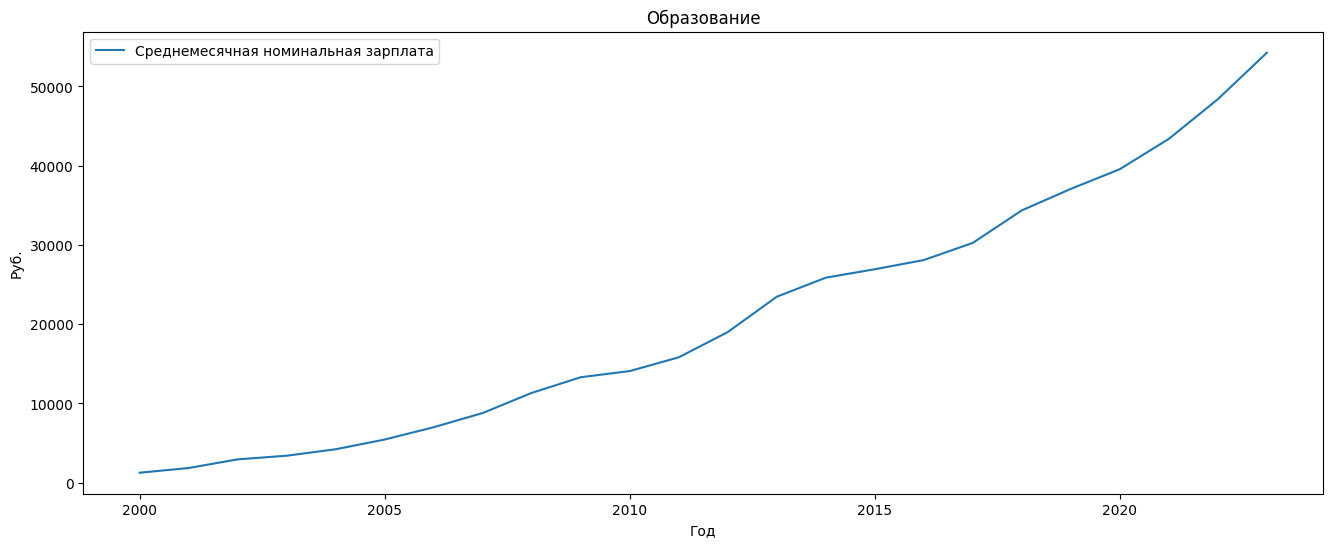

In [4]:
figure(figsize=(16, 6))
plt.title(selected_types[0])
plt.plot(range(2000, 2024), data.loc[data["type"] == selected_types[0]].values[:, 1:].flatten(), label="Среднемесячная номинальная зарплата")
plt.xlabel("Год")
plt.ylabel("Руб.")
plt.legend()
plt.show()

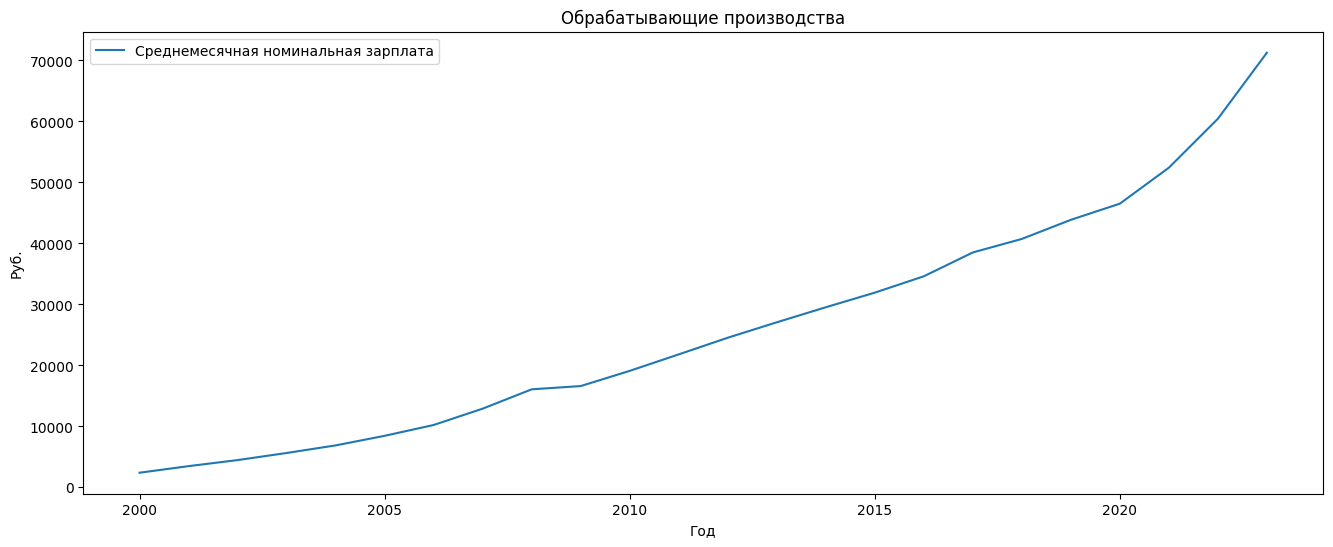

In [5]:
figure(figsize=(16, 6))
plt.title(selected_types[1])
plt.plot(range(2000, 2024), data.loc[data["type"] == selected_types[1]].values[:, 1:].flatten(), label="Среднемесячная номинальная зарплата")
plt.xlabel("Год")
plt.ylabel("Руб.")
plt.legend()
plt.show()

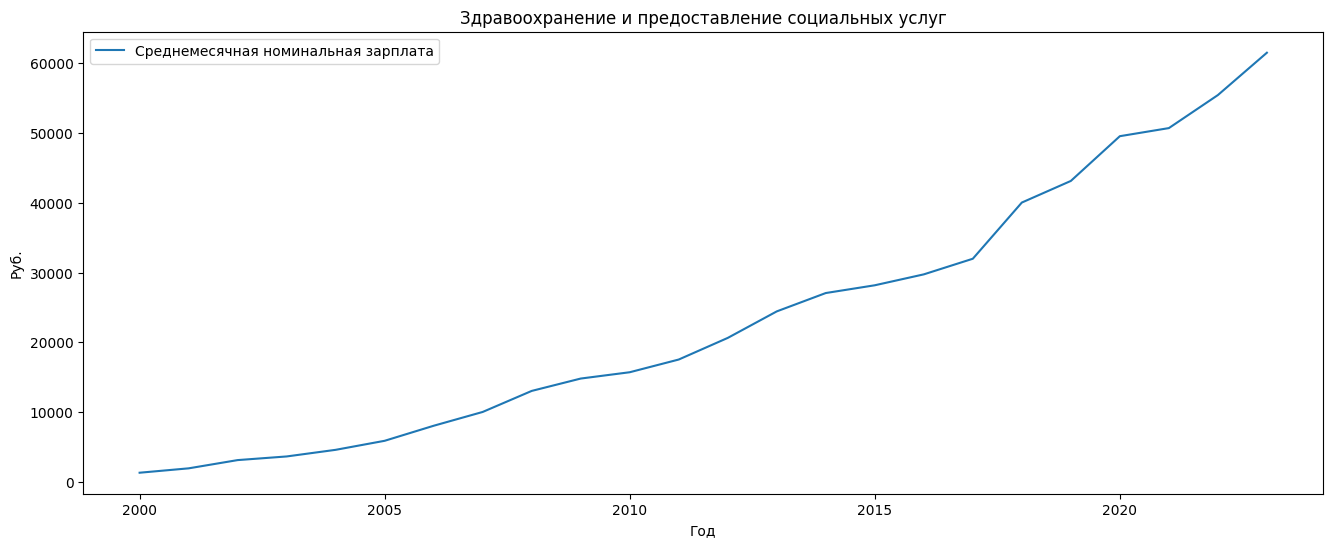

In [6]:
figure(figsize=(16, 6))
plt.title(selected_types[2])
plt.plot(range(2000, 2024), data.loc[data["type"] == selected_types[2]].values[:, 1:].flatten(), label="Среднемесячная номинальная зарплата")
plt.xlabel("Год")
plt.ylabel("Руб.")
plt.legend()
plt.show()

**Вывод:** На всех графиках заметен общий тренд, который обусловлен инфляцией. Из-за этого, хотя и можно сделать выводы об изменении зарплаты, они будут не до конца верными, ведь мы обусловлены трендом, который пока никак из данных не выделили

In [7]:
inflation_data = pd.read_csv("data/inflation.csv")

In [8]:
years = [str(i) for i in range(2000, 2024)]
selected_with_inflation = [[], [], []]
for i in range(1, len(years)):
    for j in range(3):
        nzpg = data.loc[data["type"] == selected_types[j], years[i - 1]].values[0]
        nztg = data.loc[data["type"] == selected_types[j], years[i]].values[0]
        inf = inflation_data.loc[inflation_data["Год"] == int(years[i - 1]), "Всего"].values[0]
        selected_with_inflation[j].append(nzpg * (nztg / nzpg * 100) / (100 + inf))

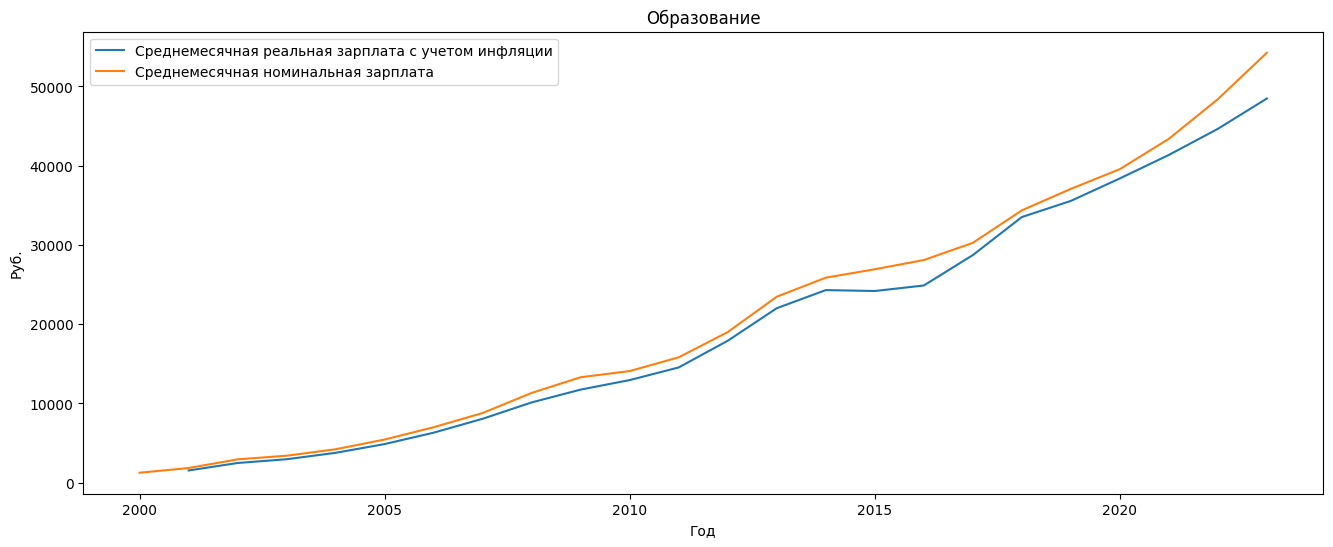

In [9]:
figure(figsize=(16, 6))
plt.title(selected_types[0])
plt.plot(range(2001, 2024), selected_with_inflation[0], label='Среднемесячная реальная зарплата с учетом инфляции')
plt.plot(range(2000, 2024), data.loc[data["type"] == selected_types[0]].values[:, 1:].flatten(), label='Среднемесячная номинальная зарплата')
plt.xlabel("Год")
plt.ylabel("Руб.")
plt.legend()
plt.show()

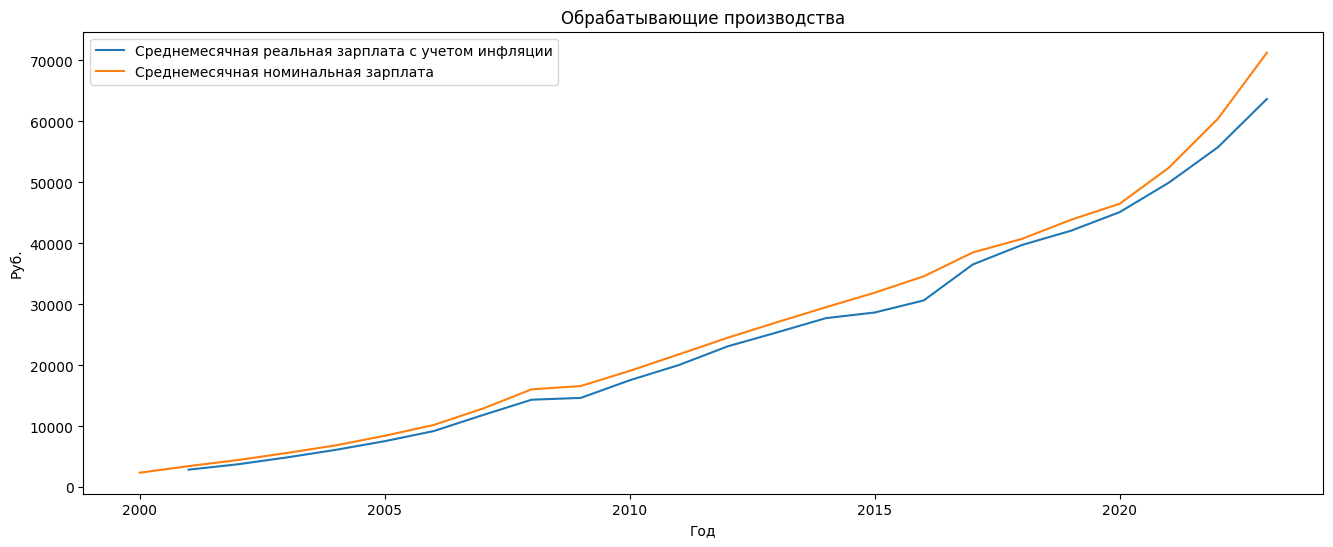

In [10]:
figure(figsize=(16, 6))
plt.title(selected_types[1])
plt.plot(range(2001, 2024), selected_with_inflation[1], label='Среднемесячная реальная зарплата с учетом инфляции')
plt.plot(range(2000, 2024), data.loc[data["type"] == selected_types[1]].values[:, 1:].flatten(), label='Среднемесячная номинальная зарплата')
plt.xlabel("Год")
plt.ylabel("Руб.")
plt.legend()
plt.show()

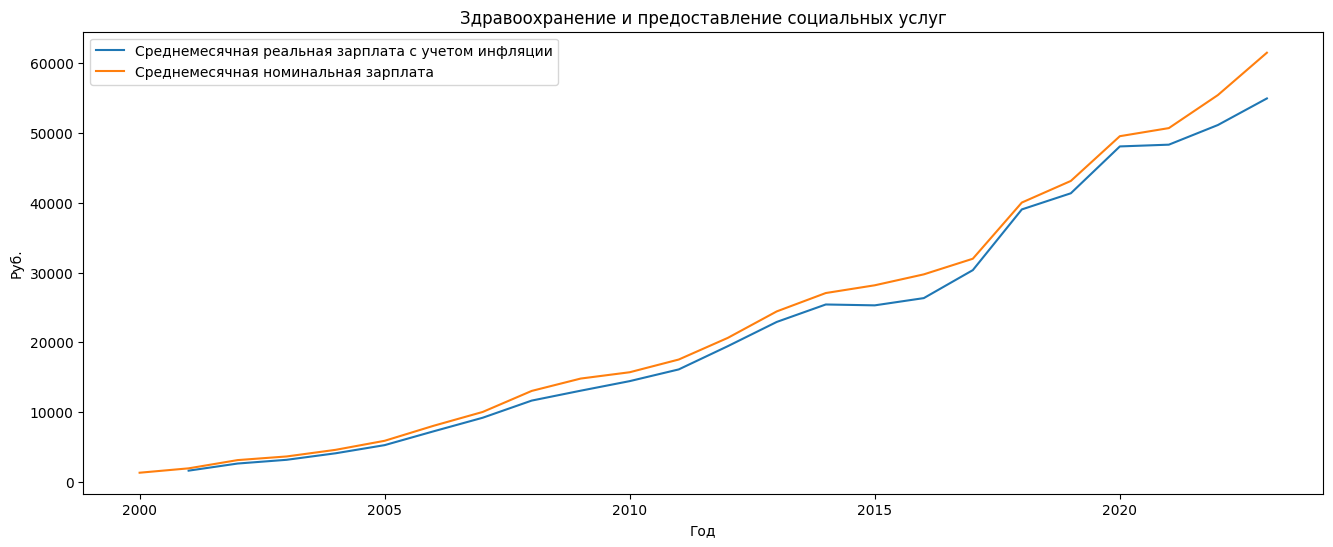

In [11]:
figure(figsize=(16, 6))
plt.title(selected_types[2])
plt.plot(range(2001, 2024), selected_with_inflation[2], label='Среднемесячная реальная зарплата с учетом инфляции')
plt.plot(range(2000, 2024), data.loc[data["type"] == selected_types[2]].values[:, 1:].flatten(), label='Среднемесячная номинальная зарплата')
plt.xlabel("Год")
plt.ylabel("Руб.")
plt.legend()
plt.show()

Ожидаемо, если считать реальные зарплаты с учетом инфляции, то они окажутся меньше, чем номинальные

Можно сделать вывод, что зарплаты в любом виде росли, вне зависимости от того, учитывать инифляцию или нет. При этом реальные зарплаты выросли немного меньше, чем номинальные

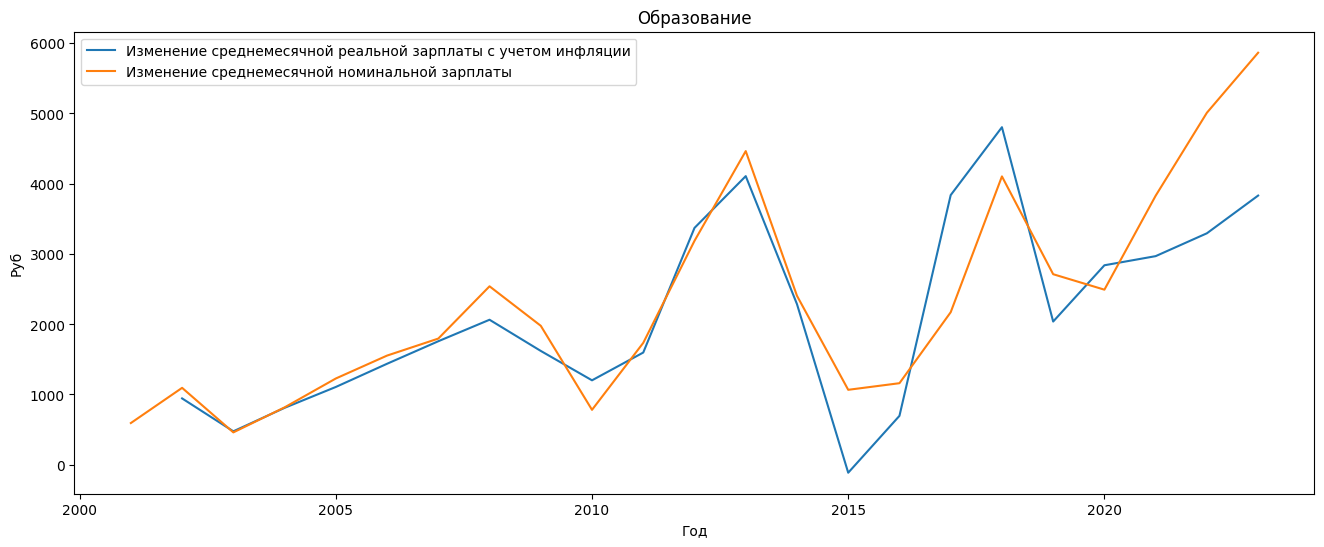

In [12]:
figure(figsize=(16, 6))
plt.title(selected_types[0])
plt.plot(range(2002, 2024), np.diff(np.array(selected_with_inflation[0]), axis=0).flatten(), label='Изменение среднемесячной реальной зарплаты с учетом инфляции')
plt.plot(range(2001, 2024), np.diff(data.loc[data["type"] == selected_types[0]].values[:, 1:].flatten()), label='Изменение среднемесячной номинальной зарплаты')
plt.xlabel("Год")
plt.ylabel("Руб")
plt.legend()
plt.show()

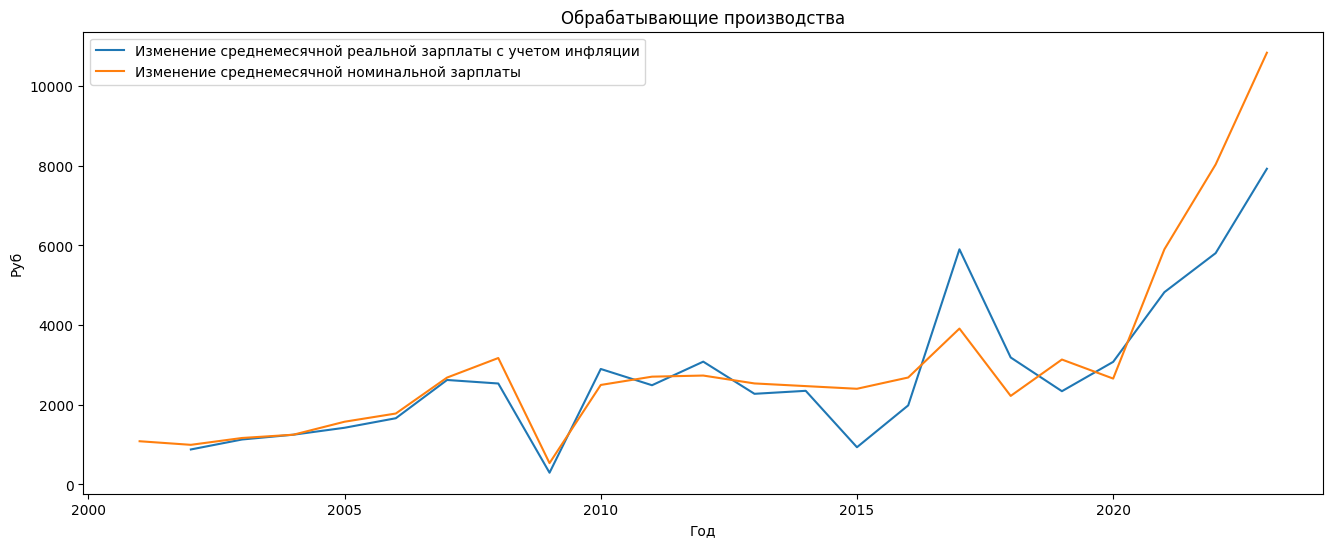

In [13]:
figure(figsize=(16, 6))
plt.title(selected_types[1])
plt.plot(range(2002, 2024), np.diff(np.array(selected_with_inflation[1]), axis=0).flatten(), label='Изменение среднемесячной реальной зарплаты с учетом инфляции')
plt.plot(range(2001, 2024), np.diff(data.loc[data["type"] == selected_types[1]].values[:, 1:].flatten()), label='Изменение среднемесячной номинальной зарплаты')
plt.xlabel("Год")
plt.ylabel("Руб")
plt.legend()
plt.show()

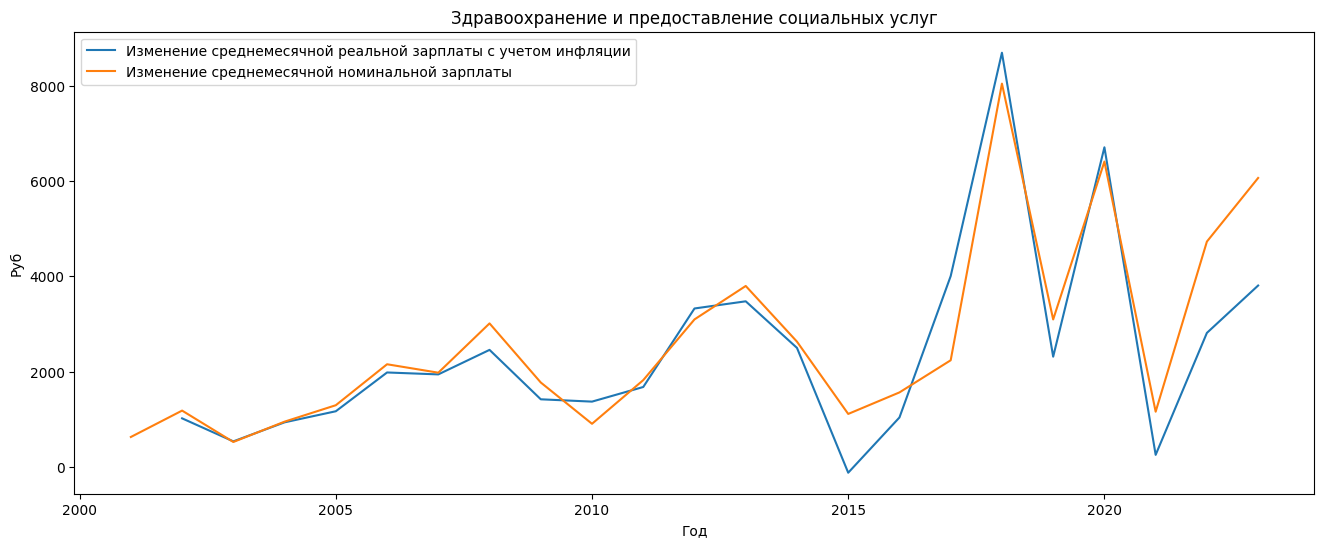

In [14]:
figure(figsize=(16, 6))
plt.title(selected_types[2])
plt.plot(range(2002, 2024), np.diff(np.array(selected_with_inflation[2]), axis=0).flatten(), label='Изменение среднемесячной реальной зарплаты с учетом инфляции')
plt.plot(range(2001, 2024), np.diff(data.loc[data["type"] == selected_types[2]].values[:, 1:].flatten()), label='Изменение среднемесячной номинальной зарплаты')
plt.xlabel("Год")
plt.ylabel("Руб")
plt.legend()
plt.show()

Интересно, что околонулевых результатов роста практически нет. При этом видно, что рост реальной зарплаты несколько отличается в меньшую сторону от роста номинальной зарплаты, а также на всех графиках видно 2 точки снижения роста. Тем не менее, явно превалирует тренд роста